In [2]:
#loading dataset
import numpy as np
import pandas as pd
#visualize
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as grid

#data splitting
from sklearn.model_selection import train_test_split

#datamodeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score,auc,roc_auc_score,classification_report,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data=pd.read_csv('/content/drive/MyDrive/Dataset/heartattack.csv')

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


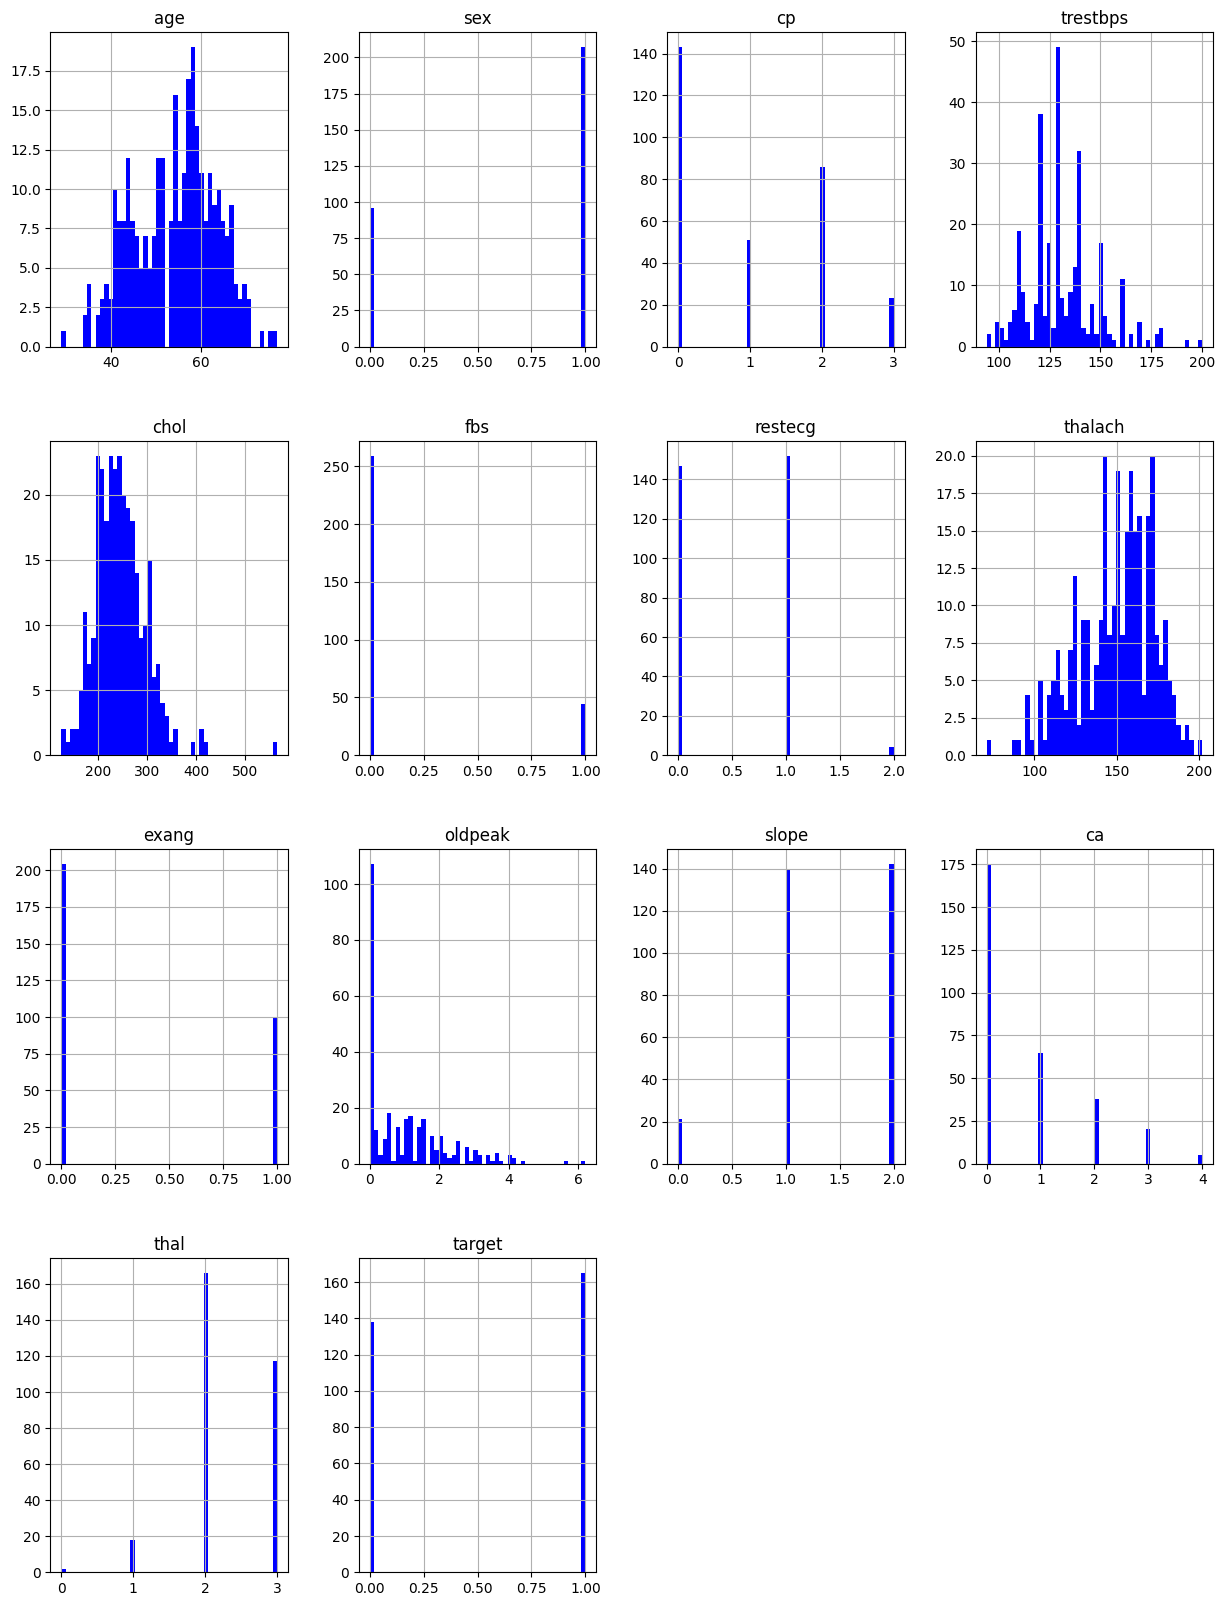

In [8]:
data.hist(bins=50,figsize=(15,20),color='blue')
plt.show()

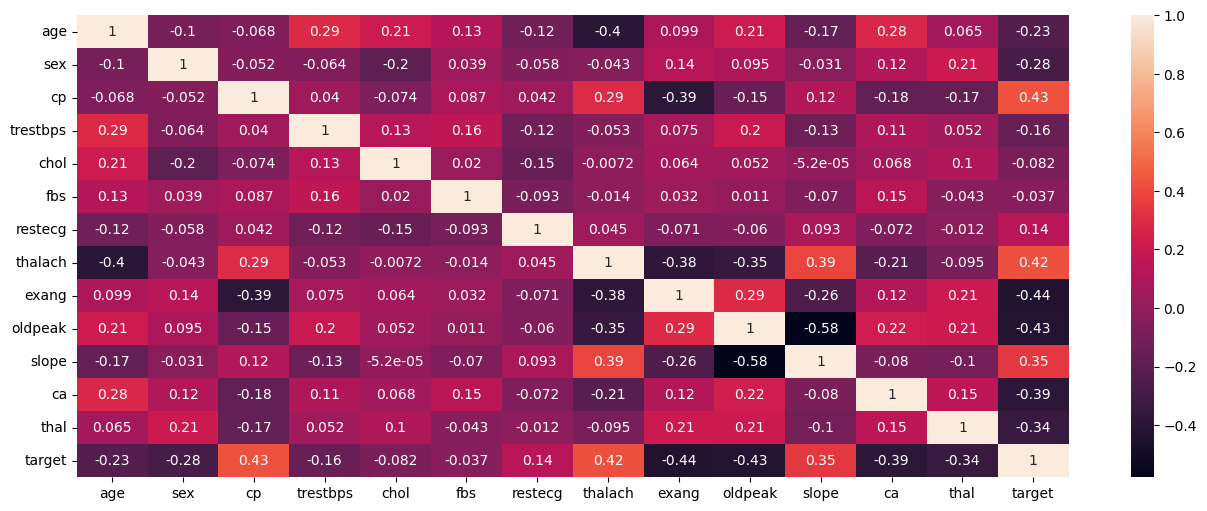

In [9]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)
plt.show()


Model Preparation

In [10]:
y=data['target']
X=data.drop('target',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [11]:
print(y_test.unique())
from collections import Counter
print(Counter(y_test))

[0 1]
Counter({1: 32, 0: 29})


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [13]:
m1='Logistic Regression'
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
lr_predict=lr.predict(  X_test)
lr_conf_matrix=confusion_matrix(y_test,lr_predict)
lr_acc_score=accuracy_score(y_test,lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[25  4]
 [ 5 27]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Naive Bayes

In [14]:
m2='Naive Bayes'
nb=GaussianNB()
model=nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)
nb_conf_matrix=confusion_matrix(y_test,nb_predict)
nb_acc_score=accuracy_score(y_test,nb_predict)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes:",nb_acc_score*100,'\n')
print(classification_report(y_test,nb_predict))

confussion matrix
[[26  3]
 [ 5 27]]


Accuracy of Naive Bayes: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



K-neighbours classifier

In [16]:
m3='K-neighbours classifier'
knn=KNeighborsClassifier(n_neighbors=10)
model=knn.fit(X_train,y_train)
knn_predict=knn.predict(X_test)
knn_conf_matrix=confusion_matrix(y_test,knn_predict)
knn_acc_score=accuracy_score(y_test,knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-neighbours classifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predict))

confussion matrix
[[27  2]
 [ 5 27]]


Accuracy of K-neighbours classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



Decision Tree


In [19]:
m4="DecisionTreeClassofoer"
dt=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=6)
model=dt.fit(X_train,y_train)
dtpredict=dt.predict(X_test)
dt_conf_matrix=confusion_matrix(y_test,dtpredict)
dt_acc_score=accuracy_score(y_test,dtpredict)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree:",dt_acc_score*100,'\n')
print(classification_report(y_test,dtpredict))

confussion matrix
[[26  3]
 [ 5 27]]


Accuracy of Decision Tree: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



SVM

In [23]:
m5='SVM'
svc=SVC(kernel='rbf',C=2)
svc.fit(X_train,y_train)
svc_predict=svc.predict(X_test)
svc_conf_matrix=confusion_matrix(y_test,svc_predict)
svc_acc_score=accuracy_score(y_test,svc_predict)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of SVM:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predict))

confussion matrix
[[26  3]
 [ 6 26]]


Accuracy of SVM: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



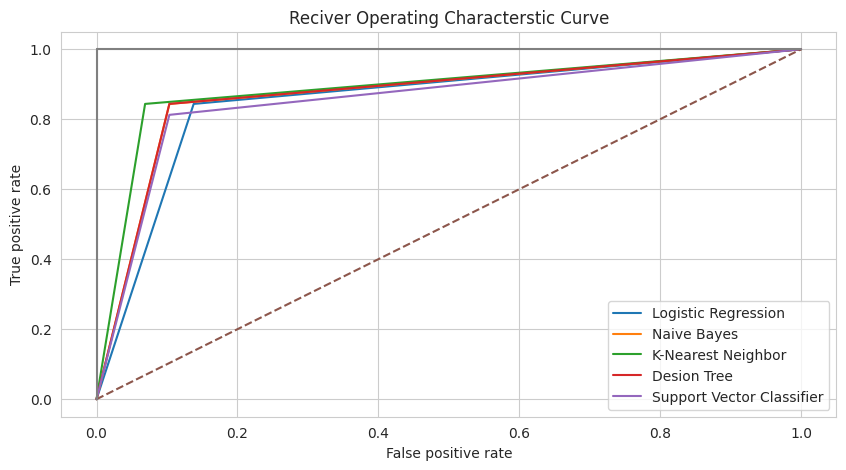

In [27]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predict)

#xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dtpredict)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')


plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

model ecvaluation

In [28]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.245902
1,Naive Bayes,86.885246
2,K-Nearest Neighbour,88.524590
3,Decision Tree,86.885246
4,Support Vector Machine,85.245902


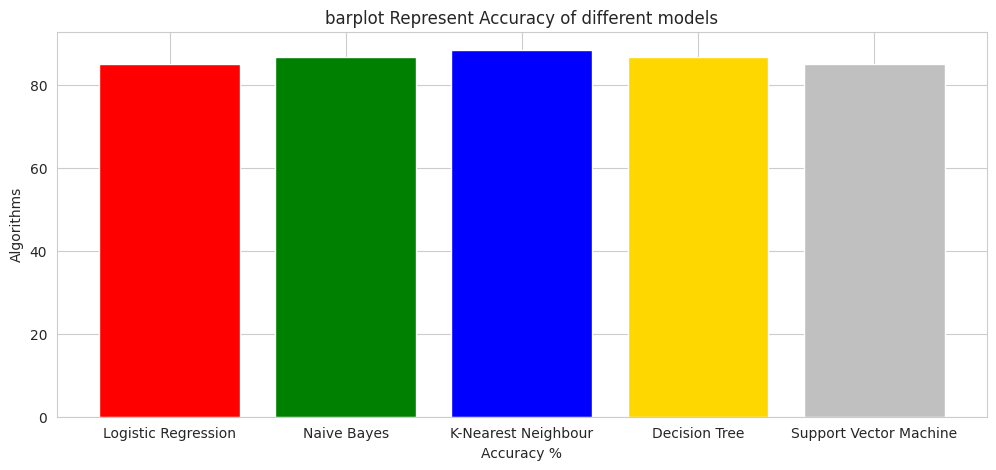

In [29]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()